In [1]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
with open('data/names.txt', 'r') as f:
    words = f.read().splitlines()

In [3]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [4]:
len(words)

32033

In [5]:
chars = sorted(list(set(''.join(words))))
print(chars)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [6]:
stoi = {s:i + 1 for i, s in enumerate(chars)}
stoi['.'] = 0
print(stoi)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}


In [7]:
itos = {i:s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [8]:
# build the dataset

block_size = 3 # context length
X, Y = [], []
for w in words[:5]:
    print(w)
    # Лист болванка из 0 для дальнейшего заполнения
    context = [0] * block_size
    # print(context)
    for ch in w + '.':
        # Индекс символа в словаре
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)

        print(''.join(itos[i] for i in context), '------>', itos[ix])
        # Убрали первый символ, добавили новый
        context = context[1:] + [ix] # crop and append
        # print(context)

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... ------> e
..e ------> m
.em ------> m
emm ------> a
mma ------> .
olivia
... ------> o
..o ------> l
.ol ------> i
oli ------> v
liv ------> i
ivi ------> a
via ------> .
ava
... ------> a
..a ------> v
.av ------> a
ava ------> .
isabella
... ------> i
..i ------> s
.is ------> a
isa ------> b
sab ------> e
abe ------> l
bel ------> l
ell ------> a
lla ------> .
sophia
... ------> s
..s ------> o
.so ------> p
sop ------> h
oph ------> i
phi ------> a
hia ------> .


In [9]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [10]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [11]:
# EmbeddingTable
C = torch.randn((27, 2))
C

tensor([[ 0.8933,  0.7276],
        [ 0.5133,  0.9704],
        [-0.0120,  0.0865],
        [ 0.2141,  0.2528],
        [-0.7069, -0.0784],
        [ 0.4993,  1.0895],
        [ 0.3547,  1.5788],
        [ 1.4594,  1.8990],
        [ 0.4322,  0.0186],
        [-2.3185,  0.4026],
        [ 1.3448,  0.8280],
        [-1.3415, -0.8707],
        [-0.1554,  1.4211],
        [ 0.1377,  1.0881],
        [-0.4443, -1.4912],
        [ 1.0549,  0.8858],
        [-1.1977,  1.0017],
        [-0.8658,  0.8833],
        [ 0.7925,  0.5745],
        [ 2.2849,  1.4067],
        [-0.5493,  1.0154],
        [ 1.3835,  1.2419],
        [ 0.2133, -0.7756],
        [ 0.6219,  1.0913],
        [-0.4212,  1.6390],
        [ 0.3312,  0.0275],
        [ 0.5875,  0.0901]])

In [12]:
F.one_hot(torch.tensor(5), num_classes=27)

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [13]:
C[5]

tensor([0.4993, 1.0895])

In [14]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([0.4993, 1.0895])

In [15]:
C[[5, 6, 7]]

tensor([[0.4993, 1.0895],
        [0.3547, 1.5788],
        [1.4594, 1.8990]])

In [16]:
C[torch.tensor([5, 6, 7])]

tensor([[0.4993, 1.0895],
        [0.3547, 1.5788],
        [1.4594, 1.8990]])

In [17]:
C[torch.tensor([5, 6, 7, 7, 7, 7])]

tensor([[0.4993, 1.0895],
        [0.3547, 1.5788],
        [1.4594, 1.8990],
        [1.4594, 1.8990],
        [1.4594, 1.8990],
        [1.4594, 1.8990]])

In [18]:
X.shape

torch.Size([32, 3])

In [19]:
C[X].shape

torch.Size([32, 3, 2])

In [20]:
X[13, 2]

tensor(1)

In [21]:
C[X][13, 2]

tensor([0.5133, 0.9704])

In [22]:
C[1]

tensor([0.5133, 0.9704])

In [23]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [24]:
# 100 - кол-во нейронов
# 6 потому что передаем по 2 эмбеддинга для каждого из 3 символов контекста
W1 = torch.randn(6, 100)
b1 = torch.randn(100)

In [25]:
# emb @ W1 + b1

In [26]:
emb.shape

torch.Size([32, 3, 2])

In [27]:
emb[:, 0, :].shape, emb[:, 1, :].shape, emb[:, 2, :].shape

(torch.Size([32, 2]), torch.Size([32, 2]), torch.Size([32, 2]))

Как он пришел к тому в каком направлении матрицы необходимо стакнуть?

In [28]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1).shape

torch.Size([32, 6])

https://docs.pytorch.org/docs/stable/generated/torch.cat.html

https://docs.pytorch.org/docs/stable/generated/torch.unbind.html

Вариант на произвольное кол-во измерений, unbind расцепляет по указанному измерению на лист тензоров, и потом их все можно скрепить через cat

In [29]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [30]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [31]:
a.shape

torch.Size([18])

In [32]:
a.view(2, 9)

tensor([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16, 17]])

In [33]:
a.view(3, 3, 2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

Любой тензор в памяти хранится как одномерная последовательность, через .view можно его увидеть в любой размерности

In [34]:
a.storage()

/var/folders/zs/lr774nl56f317p1kp7zdfxjc0000gn/T/ipykernel_16439/214256462.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [35]:
emb.shape

torch.Size([32, 3, 2])

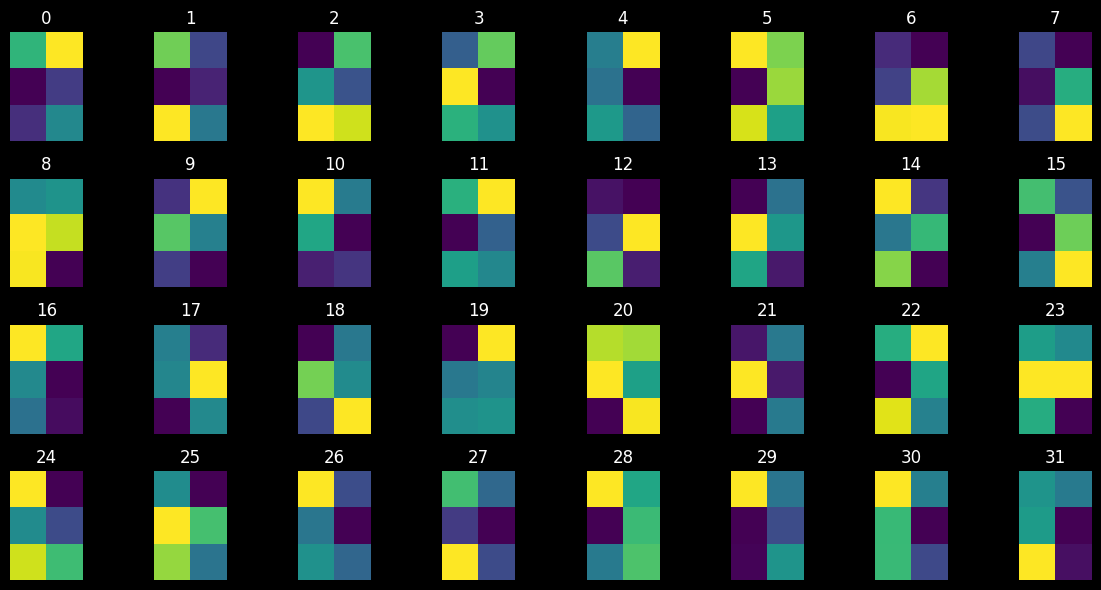

In [36]:
x = torch.randn(32, 3, 2)

fig, axes = plt.subplots(4, 8, figsize=(12, 6))
axes = axes.flatten()

for i in range(32):
    axes[i].imshow(x[i], cmap="viridis")
    axes[i].set_title(f"{i}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

In [37]:
emb[2]

tensor([[0.8933, 0.7276],
        [0.4993, 1.0895],
        [0.1377, 1.0881]])

Каждая таблица 3 буквы x 2 энкодинга была растянута в вектор из 6 чисел

Под капотом тензор это одномерный массив длиной 192, который сгибается в нужное кол-во измерений.
В нашем случае первое измерение 32 - кол-во примеров, второе измерение 2 - кол-во эмбеддингов для каждого примера, и 3 - кол-во примеров. Каждый пример это 6 подряд идущих цифр, и мы разгибаем их из представления 3x2 в 6x1

In [38]:
emb.view(32, 6)[2]

tensor([0.8933, 0.7276, 0.4993, 1.0895, 0.1377, 1.0881])

In [39]:
len(emb.storage())

192

In [40]:
torch.cat(torch.unbind(emb, 1), 1) == emb.view(32, 6)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [41]:
# Если указно -1, pytorch сам вычислит какая размерность должна быть
# h = emb.view(32, 6) @ W1
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)
h

tensor([[ 0.9378,  0.9852, -1.0000,  ..., -0.9939,  0.9777,  0.7229],
        [ 0.9448,  0.9905, -1.0000,  ..., -0.9902,  0.9234,  0.5504],
        [ 0.9778,  0.9902, -1.0000,  ..., -0.9962,  0.9458, -0.2839],
        ...,
        [ 0.9802,  0.8218, -1.0000,  ..., -1.0000,  0.9573, -0.9252],
        [ 0.9957, -0.5748,  0.9539,  ...,  0.8437, -0.9979, -0.7042],
        [-0.9768, -0.4411, -0.9966,  ..., -0.9990, -0.3434, -0.8902]])

cat и unbind под капотом создают новые tensor и занимают память, поэтому лучше использовать view

In [42]:
h.shape

torch.Size([32, 100])

In [43]:
(emb.view(-1, 6) @ W1 + b1).shape

torch.Size([32, 100])

In [44]:
b1.shape

torch.Size([100])

In [45]:
# Обязательно проверять, что broadcastring каботает как надо
# 32 100
# 1  100

In [46]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [47]:
logits = h @ W2 + b2
logits.shape

torch.Size([32, 27])

In [48]:
counts = logits.exp()
counts[:5]

tensor([[2.8601e-05, 8.6442e-08, 6.5952e-04, 2.9586e+00, 4.3932e+01, 4.6900e+07,
         3.2158e+00, 1.7200e+04, 2.6393e+07, 3.0177e-05, 1.2333e+08, 1.5594e-02,
         4.9737e-08, 1.9740e-06, 1.3416e-01, 2.4429e+00, 6.8548e+02, 6.7242e-02,
         9.8077e+06, 1.9939e+00, 2.6381e+00, 3.2175e-03, 5.0195e-08, 2.8483e+04,
         1.5257e-04, 1.8189e+00, 4.5530e-06],
        [5.6052e-08, 1.6734e-08, 3.8769e-04, 3.7234e+01, 1.5307e+03, 3.7662e+08,
         2.4246e+01, 6.0455e+03, 1.4311e+07, 1.7372e-06, 2.8942e+07, 5.0679e-03,
         2.8241e-07, 4.2530e-07, 3.2756e-02, 7.1418e+00, 2.4751e+02, 4.1871e-02,
         8.9611e+05, 1.3428e-01, 1.6225e+02, 1.9482e-03, 6.8461e-07, 1.1664e+05,
         7.9384e-04, 5.2598e-02, 6.6186e-04],
        [5.5834e-09, 7.3263e-06, 3.3943e-04, 4.3460e+02, 2.9007e+05, 4.5415e+07,
         8.7857e+02, 8.5559e+03, 2.3107e+05, 1.0444e-06, 5.2736e+07, 4.2605e-04,
         1.1944e-05, 1.9116e-07, 2.7563e-01, 4.1343e+02, 7.5608e+01, 1.2628e-02,
         2.2401e+

In [49]:
prob = counts / counts.sum(1, keepdim=True)
prob[:5]

tensor([[1.3852e-13, 4.1865e-16, 3.1942e-12, 1.4329e-08, 2.1277e-07, 2.2714e-01,
         1.5575e-08, 8.3302e-05, 1.2782e-01, 1.4615e-13, 5.9731e-01, 7.5524e-11,
         2.4089e-16, 9.5606e-15, 6.4974e-10, 1.1831e-08, 3.3199e-06, 3.2567e-10,
         4.7500e-02, 9.6569e-09, 1.2777e-08, 1.5583e-11, 2.4310e-16, 1.3795e-04,
         7.3891e-13, 8.8091e-09, 2.2051e-14],
        [1.3317e-16, 3.9759e-17, 9.2110e-13, 8.8464e-08, 3.6367e-06, 8.9481e-01,
         5.7605e-08, 1.4363e-05, 3.4001e-02, 4.1273e-15, 6.8762e-02, 1.2041e-11,
         6.7098e-16, 1.0105e-15, 7.7824e-11, 1.6968e-08, 5.8805e-07, 9.9480e-11,
         2.1291e-03, 3.1904e-10, 3.8549e-07, 4.6288e-12, 1.6265e-15, 2.7712e-04,
         1.8861e-12, 1.2497e-10, 1.5725e-12],
        [5.0160e-17, 6.5818e-14, 3.0494e-12, 3.9043e-06, 2.6060e-03, 4.0800e-01,
         7.8929e-06, 7.6865e-05, 2.0759e-03, 9.3831e-15, 4.7377e-01, 3.8276e-12,
         1.0730e-13, 1.7173e-15, 2.4762e-09, 3.7142e-06, 6.7925e-07, 1.1345e-10,
         2.0125e-

In [50]:
prob.shape

torch.Size([32, 27])

In [51]:
prob.sum(1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

Кол-во ответов которое надо дать

In [52]:
prob[torch.arange(32), Y]

tensor([2.2714e-01, 1.0105e-15, 1.7173e-15, 1.6875e-12, 2.0075e-13, 1.1831e-08,
        3.5281e-16, 5.1761e-14, 6.7678e-05, 1.7081e-09, 4.1780e-08, 8.4411e-11,
        4.1865e-16, 8.2827e-16, 1.6296e-11, 1.6036e-13, 1.4615e-13, 5.0654e-11,
        3.3319e-04, 1.7600e-17, 2.5460e-09, 1.0034e-12, 2.0221e-08, 1.3791e-09,
        6.0721e-12, 9.6569e-09, 1.5861e-09, 4.7590e-09, 5.2833e-08, 3.1921e-13,
        2.1266e-08, 8.6688e-09])

In [53]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(23.6262)

### Переписано в чистый вид

In [54]:
X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [55]:
g = torch.Generator().manual_seed(42)

# Матрица энкодингов
C = torch.randn((27, 2), generator=g)
# На вход три символа, закодированных 2 эмбеддингами = 6, в слое 100 нейронов
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100)
# На вход активации 100 нейронов, на выход вероятность каждой из 27 букв
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

In [56]:
sum(p.nelement() for p in parameters)

3481

In [57]:
# Forward pass
emb = C[X] # 32 2 3
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
logits = h @ W2 + b2
counts = logits.exp()
prob = counts / counts.sum(1, keepdim=True)
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(19.4491)

In [58]:
F.cross_entropy(logits, Y)

tensor(19.4491)

In [59]:
for p in parameters:
    p.requires_grad = True

In [60]:
losses = []
for _ in range(100):
    # Forward pass
    emb = C[X] # 32 2 3
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
    logits = h @ W2 + b2
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdim=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Y)
    losses.append(loss.item())
    print(loss.item())


    # backward pass
    for p in parameters:
        p.grad=None
    loss.backward()

    for p in parameters:
        p.data += -0.1 * p.grad

19.44908905029297
16.14081573486328
13.34804916381836
10.971795082092285
8.968472480773926
7.441400051116943
6.400206565856934
5.62344217300415
4.985288143157959
4.417385578155518
3.9007115364074707
3.4374172687530518
3.0295097827911377
2.6730093955993652
2.3638527393341064
2.0992844104766846
1.8760895729064941
1.688331961631775
1.5290091037750244
1.3929822444915771
1.2766016721725464
1.1765079498291016
1.089274287223816
1.0119946002960205
0.9426137208938599
0.8797675967216492
0.822557270526886
0.7704103589057922
0.7229841947555542
0.6800686120986938
0.6414766907691956
0.6069594025611877
0.5761891007423401
0.5488135814666748
0.5245275497436523
0.5031039714813232
0.48437029123306274
0.4681495130062103
0.4542142152786255
0.44228076934814453
0.4320398271083832
0.4231961965560913
0.41549286246299744
0.40871933102607727
0.40270790457725525
0.397326797246933
0.39247214794158936
0.3880619406700134
0.38403046131134033
0.38032427430152893
0.37690022587776184
0.3737221360206604
0.370759665966033

### Считаю на весь датасет

In [61]:
# build the dataset

block_size = 3 # context length
X, Y = [], []
for w in words:
    # print(w)
    # Лист болванка из 0 для дальнейшего заполнения
    context = [0] * block_size
    # print(context)
    for ch in w + '.':
        # Индекс символа в словаре
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)

        # print(''.join(itos[i] for i in context), '------>', itos[ix])
        # Убрали первый символ, добавили новый
        context = context[1:] + [ix] # crop and append
        # print(context)

X = torch.tensor(X)
Y = torch.tensor(Y)

In [62]:
X.shape

torch.Size([228146, 3])

In [63]:
g = torch.Generator().manual_seed(42)

# Матрица энкодингов
C = torch.randn((27, 2), generator=g)
# На вход три символа, закодированных 2 эмбеддингами = 6, в слое 100 нейронов
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100)
# На вход активации 100 нейронов, на выход вероятность каждой из 27 букв
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [64]:
losses = []
for _ in range(100):
    # Forward pass
    emb = C[X] # 32 2 3
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
    logits = h @ W2 + b2
    # counts = logits.exp()
    # prob = counts / counts.sum(1, keepdim=True)
    # loss = -prob[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Y)
    losses.append(loss.item())
    print(loss.item())


    # backward pass
    for p in parameters:
        p.grad=None
    loss.backward()

    for p in parameters:
        p.data += -0.1 * p.grad

17.235044479370117
16.32166290283203
15.520051956176758
14.829665184020996
14.225430488586426
13.680469512939453
13.185160636901855
12.721283912658691
12.279112815856934
11.857720375061035
11.458436012268066
11.082844734191895
10.731477737426758
10.403593063354492
10.09749698638916
9.811101913452148
9.542119979858398
9.288148880004883
9.047079086303711
8.817337036132812
8.597870826721191
8.38798713684082
8.187190055847168
7.995053291320801
7.81117582321167
7.635191917419434
7.466770172119141
7.305605411529541
7.151447772979736
7.0041093826293945
6.863422393798828
6.729227066040039
6.6012773513793945
6.47923469543457
6.3626708984375
6.2511515617370605
6.144299030303955
6.04182243347168
5.943515300750732
5.849220275878906
5.758806228637695
5.672145843505859
5.589107990264893
5.509558200836182
5.433351516723633
5.3603410720825195
5.290383338928223
5.223325729370117
5.159019947052002
5.097315311431885
5.038064956665039
4.981123924255371
4.926357269287109
4.873640537261963
4.822856426239014

Учимся, но итерации занимают много времени тк каждый раз надо все 220к примеров прогнать, попробуем добавить минибатчи

### Добавляем минибатчи

In [65]:
# torch.randint(0, 5, 32)

In [66]:
torch.randint(0, 5, (32,))

tensor([1, 1, 4, 1, 4, 4, 1, 0, 2, 4, 4, 4, 0, 4, 0, 4, 4, 4, 4, 0, 4, 1, 4, 2,
        0, 3, 1, 0, 4, 3, 3, 3])

In [67]:
# Семплинг 32 случайных элементов
torch.randint(0, X.shape[0], (32,))

tensor([ 27492, 176164,  81380, 197604, 150533,  44649,  44813,  58738, 122399,
        106204, 180384,  58048, 186454,  69485,  57170, 179562, 109220,  94327,
         98573, 141905, 178130,  37786,  28762,  16687, 197726, 196168,  37427,
        111607, 175873, 188963, 109034, 133834])

In [68]:
g = torch.Generator().manual_seed(42)

# Матрица энкодингов
C = torch.randn((27, 2), generator=g)
# На вход три символа, закодированных 2 эмбеддингами = 6, в слое 100 нейронов
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100)
# На вход активации 100 нейронов, на выход вероятность каждой из 27 букв
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [69]:
losses = []
for _ in range(1000):
    # Construct minibatch
    ix = torch.randint(0, X.shape[0], (32,))

    # Forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    losses.append(loss.item())


    # backward pass
    for p in parameters:
        p.grad=None
    loss.backward()

    for p in parameters:
        p.data += -0.1 * p.grad
print(loss.item())

2.5680980682373047


In [70]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
f'{loss.item():3f}'

'2.655376'

? А разве минибатчи так достаются? Я думал что сначала перемешивается случайно датасет, и потом по нему подряд идем и берем по batch_size семплов каждый раз

### Настройка LR

In [71]:
g = torch.Generator().manual_seed(42)

# Матрица энкодингов
C = torch.randn((27, 2), generator=g)
# На вход три символа, закодированных 2 эмбеддингами = 6, в слое 100 нейронов
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100)
# На вход активации 100 нейронов, на выход вероятность каждой из 27 букв
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

Семплируем в логарифмическом масштабе

In [72]:
# lre = torch.linspace(0.0001, 1, 1000)
lre = torch.linspace(-3, 0, 1000)
lrs = 10 ** lre
x_ax = np.arange(1,1001)

In [73]:
10 ** -3, 10 ** 0

(0.001, 1)

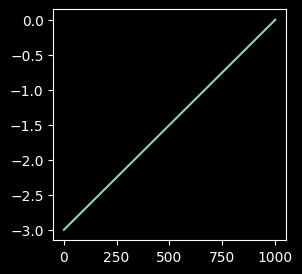

In [74]:
plt.figure(figsize=(3, 3))
plt.plot(x_ax, lre)

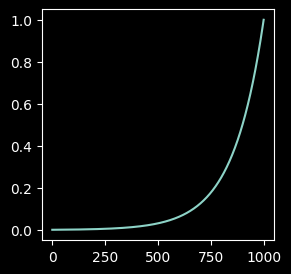

In [75]:
plt.figure(figsize=(3, 3))
plt.plot(x_ax, lrs)

In [76]:
g = torch.Generator().manual_seed(42)

# Матрица энкодингов
C = torch.randn((27, 2), generator=g)
# На вход три символа, закодированных 2 эмбеддингами = 6, в слое 100 нейронов
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100)
# На вход активации 100 нейронов, на выход вероятность каждой из 27 букв
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

Очень мелкий lr - почти не учимся (0.0001)

Приемлемый lr - учимся, вопрос с какой скоростью (0.1, 1)

Большой lr - не учимся (10)

In [77]:
lri = []
losses = []

for i in range(1000):
    # Construct minibatch
    ix = torch.randint(0, X.shape[0], (32,))

    # Forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])

    # backward pass
    for p in parameters:
        p.grad=None
    loss.backward()

    lr = lrs[i]
    for p in parameters:
        p.data += -lr * p.grad

    lri.append(lre[i])
    losses.append(loss.item())

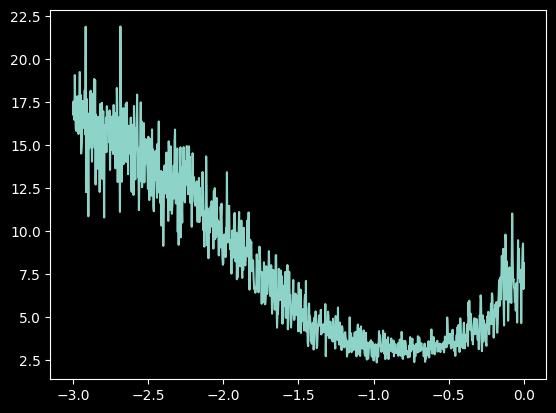

In [78]:
# Примерно в районе экспоненты веса -1 (10 ** -1, 0.1) находится базовый оптимальный вес, начинаем учиться с ним
plt.plot(lri, losses)

### Запускаем долгий расчет с хорошим LR

In [79]:
g = torch.Generator().manual_seed(42)

# Матрица энкодингов
C = torch.randn((27, 2), generator=g)
# На вход три символа, закодированных 2 эмбеддингами = 6, в слое 100 нейронов
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100)
# На вход активации 100 нейронов, на выход вероятность каждой из 27 букв
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [80]:
lri = []
losses = []

for i in range(10000):
    # Construct minibatch
    ix = torch.randint(0, X.shape[0], (32,))

    # Forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])

    # backward pass
    for p in parameters:
        p.grad=None
    loss.backward()
    losses.append(loss.item())
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad

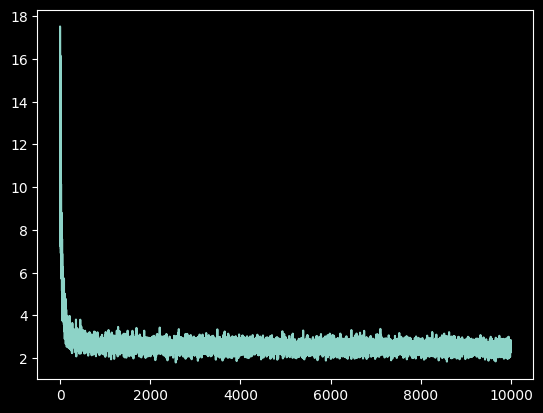

In [81]:
plt.plot(torch.arange(10000), losses)

После того как пришли к стабильному состоянию на большом LR можно проставить LR поменьше (вариант lr decay)

In [82]:
lri = []
losses = []

for i in range(10000):
    # Construct minibatch
    ix = torch.randint(0, X.shape[0], (32,))

    # Forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])

    # backward pass
    for p in parameters:
        p.grad=None
    loss.backward()
    losses.append(loss.item())
    lr = 0.001
    for p in parameters:
        p.data += -lr * p.grad

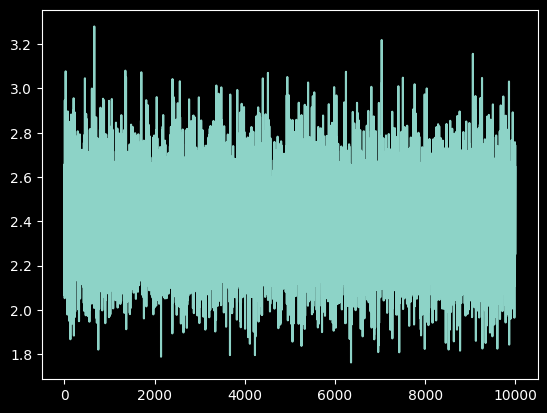

In [83]:
plt.plot(torch.arange(10000), losses)

In [84]:
emb = C[X]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
f'{loss.item():3f}'

'2.384268'

### Добавляем деление на train / val / test set

In [85]:
# train - 80%
# val - 10%
# test - 10%

Не злоупотреблять тестированием на test set, иначе и на него можно оверфитнуться

In [86]:
def build_dataset(words):
    # build the dataset
    block_size = 3 # context length
    X, Y = [], []
    for w in words:
        # print(w)
        # Лист болванка из 0 для дальнейшего заполнения
        context = [0] * block_size
        # print(context)
        for ch in w + '.':
            # Индекс символа в словаре
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)

            # print(''.join(itos[i] for i in context), '------>', itos[ix])
            # Убрали первый символ, добавили новый
            context = context[1:] + [ix] # crop and append
            # print(context)

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

In [87]:
len(words)

32033

In [88]:
import random
random.seed(42)
random.shuffle(words)

n1 = int(len(words) * 0.8)
n2 = int(len(words) * 0.9)

X_train, Y_train = build_dataset(words[:n1])
X_val, Y_val = build_dataset(words[n1:n2])
X_test, Y_test = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [89]:
n1

25626

In [90]:
g = torch.Generator().manual_seed(42)

# Матрица энкодингов
C = torch.randn((27, 2), generator=g)
# На вход три символа, закодированных 2 эмбеддингами = 6, в слое 100 нейронов
W1 = torch.randn((6, 100), generator=g)
b1 = torch.randn(100)
# На вход активации 100 нейронов, на выход вероятность каждой из 27 букв
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

In [91]:
losses = []
for _ in range(30000):
    # Construct minibatch
    ix = torch.randint(0, X_train.shape[0], (32,))

    # Forward pass
    emb = C[X_train[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y_train[ix])
    losses.append(loss.item())

    # backward pass
    for p in parameters:
        p.grad=None
    loss.backward()

    for p in parameters:
        p.data += -0.1 * p.grad
print(loss.item())

2.607412099838257


Evaluate

In [92]:
emb = C[X_val]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_val)
loss

tensor(2.4025, grad_fn=<NllLossBackward0>)

In [93]:
emb = C[X_train]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_train)
loss

tensor(2.4055, grad_fn=<NllLossBackward0>)

Видим похожий loss на train и val. Перфоманс примерно одинаковый, выводы из этого:
1) Мы не переобучились
2) ТК перфоманс на трейне не лучше перфоманса на val сете, мы возможно еще недоучились, можно получить лучший перфоманс (базово через скейлинг модели)

### Увеличиваем модель

In [94]:
g = torch.Generator().manual_seed(42)

# Матрица энкодингов
C = torch.randn((27, 2), generator=g)
# На вход три символа, закодированных 2 эмбеддингами = 6, в слое 100 нейронов
W1 = torch.randn((6, 300), generator=g)
b1 = torch.randn(300)
# На вход активации 100 нейронов, на выход вероятность каждой из 27 букв
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

print(sum(p.nelement() for p in parameters))

10281


In [95]:
lri = []
lossi = []
stepi = []


for i in range(30000):
    # Construct minibatch
    ix = torch.randint(0, X_train.shape[0], (256,))

    # Forward pass
    emb = C[X_train[ix]]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y_train[ix])
    losses.append(loss.item())

    # backward pass
    for p in parameters:
        p.grad=None
    loss.backward()

    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad

    stepi.append(i)
    lossi.append(loss.item())

print(loss.item())

2.4540016651153564


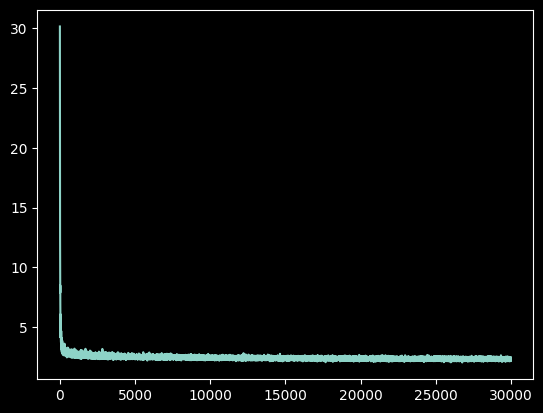

In [96]:
plt.plot(stepi, lossi)

In [97]:
emb = C[X_train]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_train)
print(f'Train set loss: {loss:.3f}')

emb = C[X_val]
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # 32 100
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_val)
print(f'Val set loss: {loss:.3f}')

Train set loss: 2.374
Val set loss: 2.376


Поигрались с lr и batch size, значимого прироста не получили, возможно слабое место модели - эмбеддинги, сейчас мы для каждого символа контекста дали кодировку из 2 эмбеддингов, возможно этого мало

Визуализация выученных эмбеддингов для букв

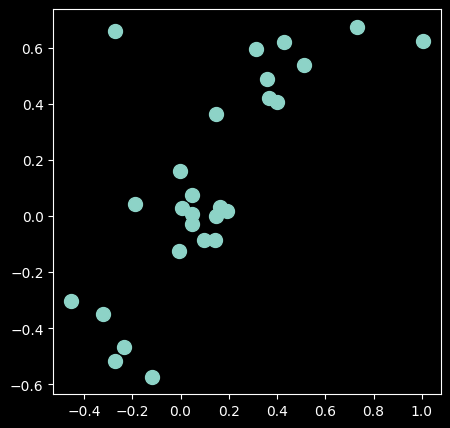

In [98]:
plt.figure(figsize=(5, 5))
plt.scatter(C[:, 0].data, C[:, 1].data, s=100)

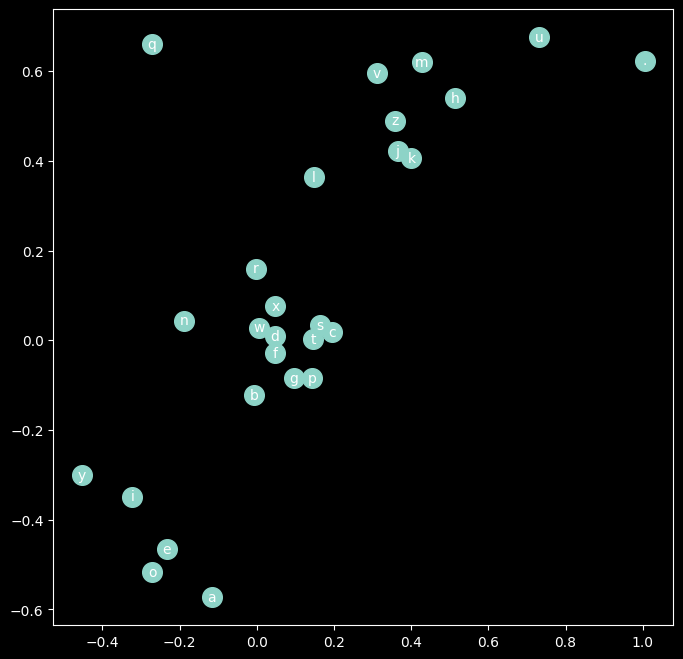

In [99]:
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)

for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha='center', va='center')

Что находится рядом друг с другом - близко по смыслу для нейронки

In [100]:
g = torch.Generator().manual_seed(42)

# Матрица энкодингов
C = torch.randn((27, 10), generator=g)
# На вход три символа, закодированных 2 эмбеддингами = 6, в слое 100 нейронов
W1 = torch.randn((30, 300), generator=g)
b1 = torch.randn(300)
# На вход активации 100 нейронов, на выход вероятность каждой из 27 букв
W2 = torch.randn((300, 27), generator=g)
b2 = torch.randn(27)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
    p.requires_grad = True

print(sum(p.nelement() for p in parameters))

17697


In [101]:
lri = []
lossi = []
stepi = []

In [102]:
for i in range(10000):
    # Construct minibatch
    ix = torch.randint(0, X_train.shape[0], (256,))

    # Forward pass
    emb = C[X_train[ix]]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # 32 100
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y_train[ix])
    losses.append(loss.item())

    # backward pass
    for p in parameters:
        p.grad=None
    loss.backward()

    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad

    stepi.append(i)
    # lossi.append(loss.item())
    # Рисуем logloss, выглядит лучше
    lossi.append(loss.log10().item())
print(loss.item())

4.224982261657715


In [103]:
# len(lossi)

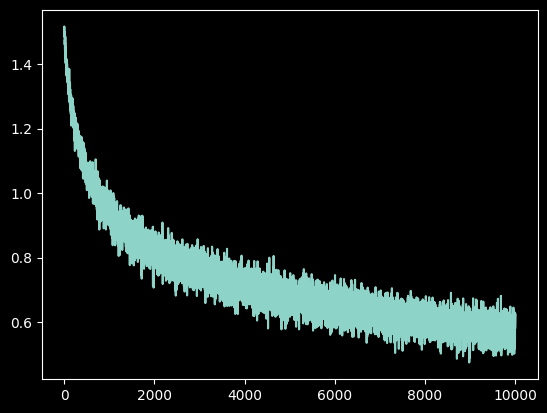

In [104]:
plt.plot(stepi, lossi)

In [105]:
emb = C[X_train]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # 32 100
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_train)
print(f'Train set loss: {loss:.3f}')

emb = C[X_val]
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # 32 100
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y_val)
print(f'Val set loss: {loss:.3f}')

Train set loss: 3.712
Val set loss: 3.746


### Семплирование

In [106]:
g = torch.Generator().manual_seed(42)

for _ in range(20):
    out = []
    context = [0] * block_size # старт с ...
    while True:
        # Контекст на вход, в начале ..., далее заполняется сгенерированными буквами
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        # exps logits
        probs = F.softmax(logits, dim=-1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    print(''.join(itos[i] for i in out))

anftoell.
jamden.
dulion.
shan.
sil.
ymliza.
mahlo.
man.
emirah.
den.
dmya.
kendnomarytte.
ale.
ranellynna.
caliig.
a.
zayla.
tya.
calyan.
mar.
